# Лабораторная работа по модулю «Построение моделей»

### Описание столбцов

1. <i>name</i>: Name of the country concerned
2. <i>landmass</i>: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. <i>zone</i>: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. <i>area</i>: in thousands of square km
5. <i>population</i>: in round millions
6. <i>language</i>: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. <i>religion</i>: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. <i>bars</i>: Number of vertical bars in the flag
9. <i>stripes</i>: Number of horizontal stripes in the flag
10. <i>colours</i>: Number of different colours in the flag
11. <i>red</i>: 0 if red absent, 1 if red present in the flag
12. <i>green</i>: same for green
13. <i>blue</i>: same for blue
14. <i>gold</i>: same for gold (also yellow)
15. <i>white</i>: same for white
16. <i>black</i>: same for black
17. <i>orange</i>: same for orange (also brown)
18. <i>mainhue</i>: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. <i>circles</i>: Number of circles in the flag
20. <i>crosses</i>: Number of (upright) crosses
21. <i>saltires</i>: Number of diagonal crosses
22. <i>quarters</i>: Number of quartered sections
23. <i>sunstars</i>: Number of sun or star symbols
24. <i>crescent</i>: 1 if a crescent moon symbol present, else 0
25. <i>triangle</i>: 1 if any triangles present, 0 otherwise
26. <i>icon</i>: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. <i>animate</i>: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. <i>text</i>: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. <i>topleft</i>: colour in the top-left corner (moving right to decide tie-breaks)
30. <i>botright</i>: Colour in the bottom-left corner (moving left to decide tie-breaks)

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [255]:
columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours',
           'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires',
           'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [256]:
df = pd.read_csv('flag.data', header=None, names=columns)

In [257]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [259]:
df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


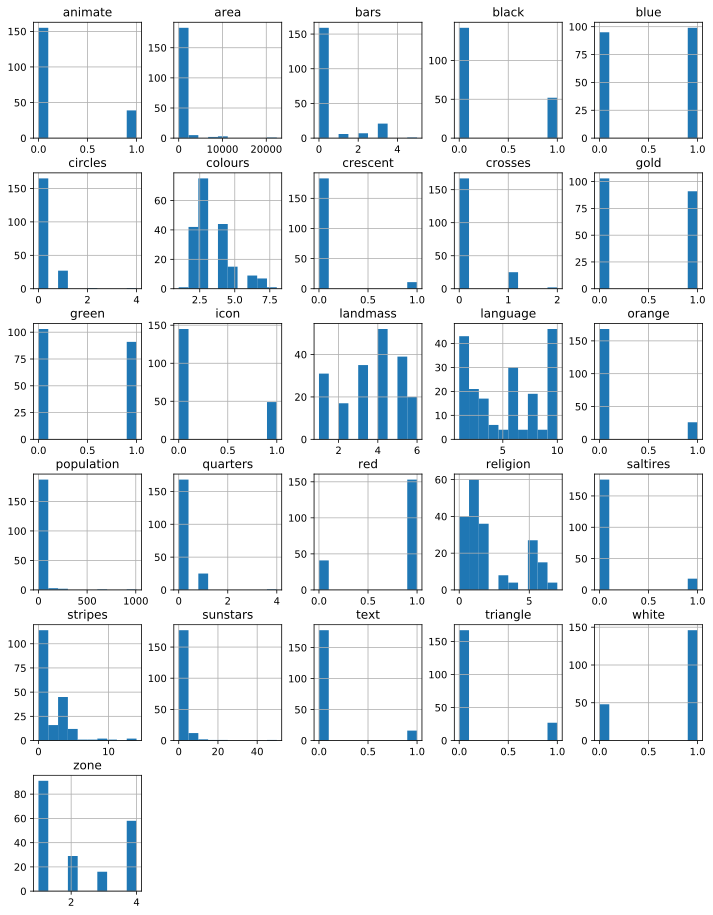

In [260]:
rcParams['figure.figsize'] = 12,16
_ = df.hist()

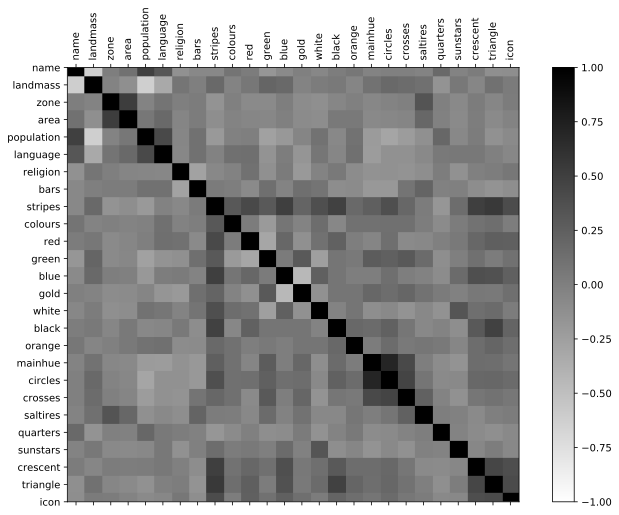

In [261]:
chart = df.drop(['topleft','botright'], axis=1).corr()
fig, ax = plt.subplots(1, 1, figsize=(12,8))
colorbar = ax.matshow(chart, cmap='binary', vmin=-1, vmax=1)
fig.colorbar(colorbar)
ticks = np.arange(0,len(chart.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
_ = plt.show()

In [262]:
cat_col = ['name', 'topleft', 'botright', 'mainhue']

In [263]:
for i in cat_col:
    try:
        cat_encod = LabelEncoder()
        df[i] = cat_encod.fit_transform(df[i])
    except:
        continue

df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,0,4
1,1,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,5,6
2,2,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,3,7
3,3,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,1,6
4,4,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,6


In [264]:
y = df['bars']
X = df.drop(['bars'], axis=1)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
%%time

params = {'n_estimators':[1,10,50,100,250,500],
          'max_depth':[1,5,10,30,50],
         'min_samples_split':[1,5,10,20],
          'n_jobs':[-1],
         'random_state': [42]}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [268]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.8329166666666667
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 42}


In [275]:
%%time

params = {'max_depth':[1,5,10,30,50],
          'max_features':[1,10,50,100],
          'n_jobs':[-1],
         'random_state': [42]}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=10)
grid_dt.fit(X_train, y_train)

CPU times: user 466 ms, sys: 3.68 ms, total: 470 ms
Wall time: 469 ms


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 30, 50],
                   

In [286]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)

0.8129166666666666
{'max_depth': 1, 'max_features': 1, 'random_state': 42}


In [293]:
%%time

params = {'n_estimators':[1,10,50,100],
         'max_samples':[1,5,10,30,50,70,100],
          'max_features':[1,10,50,100],
          'n_jobs':[-1],
         'random_state': [42]}

grid_bc = GridSearchCV(BaggingClassifier(), param_grid=params, cv=10)
grid_bc.fit(X_train, y_train)

CPU times: user 23.2 s, sys: 33.1 s, total: 56.4 s
Wall time: 56.5 s


GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [1, 10, 50, 100],
                         'max_samples': [1, 5, 10, 30, 50, 70, 100],
                         'n_estimators': [1, 10, 50, 100], 'n_jobs': [-1],
                         'random_state': [42]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [294]:
print(grid_bc.best_score_)
print(grid_bc.best_params_)

0.8129166666666666
{'max_features': 1, 'max_samples': 10, 'n_estimators': 1, 'n_jobs': -1, 'random_state': 42}


In [295]:
pred_rf = grid_rf.predict(X_test)
pred_dt = grid_dt.predict(X_test)
pred_bc = grid_bc.predict(X_test)

In [296]:
print('+' + 59*'-' + '+')
print('| ' + 18*' ' + ' | ' + 'accuracy' + ' | ' + ' f1 ' + ' | ' + 'precision' + ' | ' + 'recall' + ' |')
print('+' + 59*'-' + '+')
print (f"| {'Random Forest':<18} | {accuracy_score(y_test, pred_rf):>8.2f} | "
       f"{f1_score(y_test, pred_rf, average='macro'):>2.2f} | "
       f"{precision_score(y_test, pred_rf, average='macro'):>9.2f} | "
       f"{recall_score(y_test, pred_rf, average='macro'):>6.2f} |")
print('+' + 59*'-' + '+')
print (f"| {'Decision Tree':<18} | {accuracy_score(y_test, pred_dt):>8.2f} | "
       f"{f1_score(y_test, pred_dt, average='macro'):>2.2f} | "
       f"{precision_score(y_test, pred_dt, average='macro'):>9.2f} | "
       f"{recall_score(y_test, pred_dt, average='macro'):>6.2f} |")
print('+' + 59*'-' + '+')
print (f"| {'Bagging':<18} | {accuracy_score(y_test, pred_bc):>8.2f} | "
       f"{f1_score(y_test, pred_bc, average='macro'):>2.2f} | "
       f"{precision_score(y_test, pred_bc, average='macro'):>9.2f} | "
       f"{recall_score(y_test, pred_bc, average='macro'):>6.2f} |")
print('+' + 59*'-' + '+')

+-----------------------------------------------------------+
|                    | accuracy |  f1  | precision | recall |
+-----------------------------------------------------------+
| Random Forest      |     0.85 | 0.58 |      0.68 |   0.57 |
+-----------------------------------------------------------+
| Decision Tree      |     0.85 | 0.46 |      0.42 |   0.50 |
+-----------------------------------------------------------+
| Bagging            |     0.85 | 0.46 |      0.42 |   0.50 |
+-----------------------------------------------------------+


Здесь я бы отдал предпочтение Random Forest.

In [297]:
confusion_matrix(y_test, pred_bc)

array([[33,  0],
       [ 6,  0]])

In [298]:
grid_rf.best_params_

{'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 50,
 'random_state': 42}

In [300]:
best_rf = RandomForestClassifier(max_depth = 10, min_samples_split = 5, n_estimators=50, random_state= 42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)